In [1]:
import os
from midifile import *
from neuralnet import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-poster")

fileNames = [fileName for fileName in os.listdir("midiIn") if 'Bach' in str(fileName)]
fileNames

Using TensorFlow backend.


['Bach_Cantate_BWV20.mid',
 'Bach_Cantate_BWV33.mid',
 'Bach_Cantate_BWV8.midi',
 'Bach_Christ_Lay_Bonds_Death_BWV4.mid',
 'Bach_How_Brightly_Shines_Morning_Star_BWV1.mid',
 'Bach_My_Heart_Ever_Faithful_BWV34.mid']

In [ ]:
####### For Training across all songs in the fileNames list
#######

# sl = 20
# X = np.empty(shape=(10, sl, 1)) # shape[0] doesn't matter to the model
# model = network(X)
# data_seeds = []
# for track in fileNames:
#     mf = midiFile(track)
#     X,Y = mf.get_trainable_arrays(seq_length=sl)
#     data_seed = X[0]
#     data_seed = np.reshape(data_seed, (1, sl, 1))
#     data_seeds.append(data_seed)
#     target = mf.encode_target(Y)
#     model.train(X,target,epochs=100,batch_size=5)

### Load model and track, setup data

In [2]:
sl = 20
X = np.empty(shape=(10, sl, 1)) # shape[0] doesn't matter to the model
model = network(X).load_best_model()

mf = midiFile(fileNames[-1])
X,Y = mf.get_trainable_arrays(seq_length=sl)
data_seed = X[0]
data_seed = np.reshape(data_seed, (1, sl, 1))
target = mf.encode_target(Y)

Converting to CSV
X & Y Correlation:
 [60 57 46 57 53 58 55 60 57 45 65 57 53 64 58 52 62 57 50 60] 58 
Actual Data Correlation:
 [50 60 58]


## Use current song to generate a new result

In [3]:
train_results = model.model.predict(X)
tr_results = []
for val in train_results:
    tr_results.append(np.argmax(val))

In [4]:
preds = model.model.predict(X)
tr_results = []
plot_results = []
for p in preds:
    tr_results.append([list(np.where(p==x)[0])[0] for x in p if x > 0.2])
    plot_results.append(np.argmax(p))

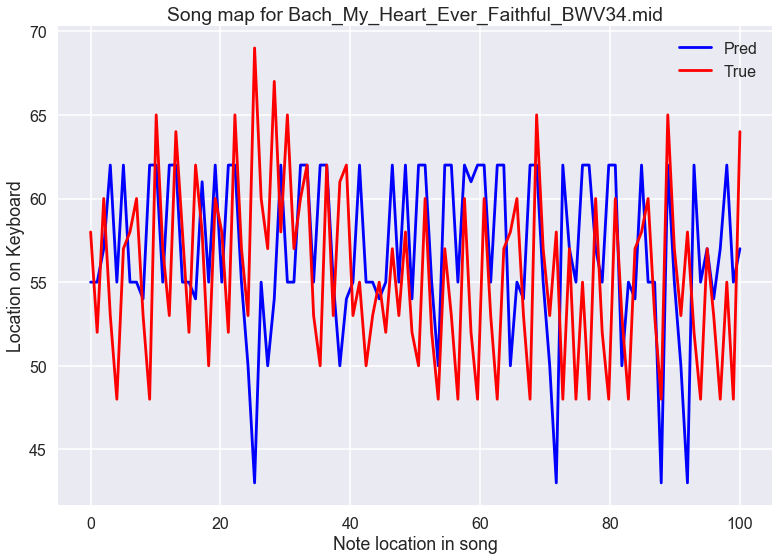

In [5]:
lowx = 0
highx = 100
plt.plot(np.linspace(0,len(plot_results[lowx:highx]),len(plot_results[lowx:highx])),plot_results[lowx:highx],'b',label="Pred")
plt.plot(np.linspace(0,len(Y[lowx:highx]),len(Y[lowx:highx])),Y[lowx:highx],'r',label="True");
plt.xlabel("Note location in song")
plt.ylabel("Location on Keyboard")
plt.title("Song map for %s"%mf.fname)
plt.legend()

In [ ]:
notes = mf.convert_to_midi_format(tr_results)
mf.makeMidiOut(notes)

In [ ]:
mf.convertMidiToMp3()

## Generate new song from seed

In [6]:
pl_results = []
results = []
for i in range(2000):
    if i%500==0:
        print("Generating point ",i)
    data_seed = np.reshape(data_seed, (1, sl, 1))
    next_val = model.model.predict(data_seed)
    results.append([list(np.where(next_val[0]==x)[0])[0] for x in next_val[0] if x > 0.2])
    next_val = np.argmax(next_val)
    pl_results.append(next_val)
    next_val = np.reshape(next_val,(1))
    data_seed = data_seed[0].tolist()
    data_seed.append([next_val])
    data_seed = data_seed[1:len(data_seed)]

Generating point  0
Generating point  500
Generating point  1000
Generating point  1500


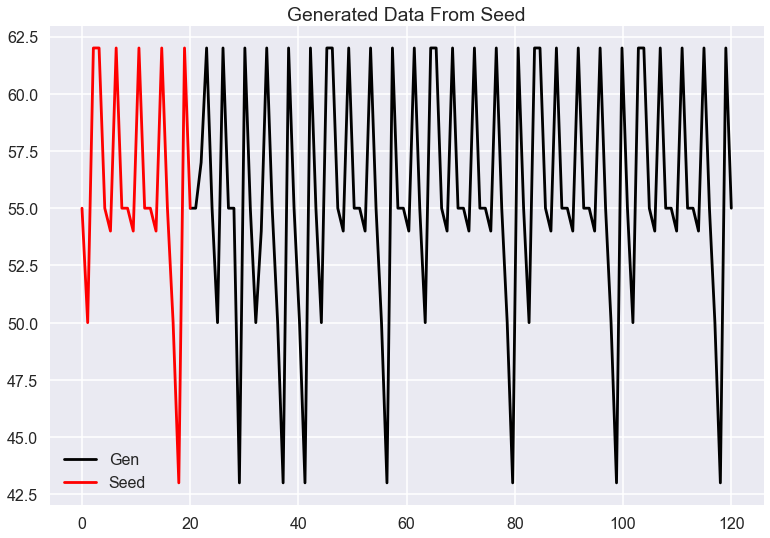

In [7]:
lowx = 0
highx = 100
data = data_seed
plt.plot(np.linspace(0,len(pl_results[lowx:highx]),len(pl_results[lowx:highx]))+sl,pl_results[lowx:highx],'k',label="Gen")
plt.plot(np.linspace(0,len(data[0:sl]),len(data[0:sl])),data[0:sl],'r',label="Seed");
plt.title("Generated Data From Seed")
plt.legend()

In [ ]:
notes = mf.convert_to_midi_format(results)
mf.makeMidiOut(notes)

In [ ]:
mf.convertMidiToMp3()